# Predição de Despesas Médicas do Seguro de Saúde

Este conjunto de dados *insurance.csv* representa despesas médicas de indivíduos nos EUA.<br/>
Predizer despesas médicas é de fundamental importância para uma empresa de seguros de saúde. É tambem de interesse de cada pessoa.

#### Vamos realizar uma analise exploratória dos dados (EDA) utilizado o Seaborn

- age: idade do beneficiário primário.
- sex: empreiteiro de seguros gênero feminino, masculino.
- bmi: Índice de massa corporal (IMC),  a relação entre altura e peso é dada por (kg / m ^ 2), idealmente o valor deve ficar entre 18,5 a 24,9.
- children: Número de dependentes / Número de crianças cobertas pelo seguro de saúde.
- smoker: A pessoa é fumante ou não.
- region: a área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste e noroeste.
- expenses: custos médicos individuais faturados pelo seguro de saúde.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('../data/insurance.csv')

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [19]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [14]:
iqr = data['age'].quantile(.75) - data['age'].quantile(.25)
limite_inferior = data['age'].median() - (iqr*1.5)
limite_superior = data['age'].median() + (iqr*1.5)

75.0

In [24]:
data[data['age'].between(limite_inferior, limite_superior)]['isAgeOutlier'] = 0

In [31]:
def onInterval(vMin, vMax, value):
    if value >= vMin and value <= vMax:
        return 1
    return 0

In [34]:
data.age.apply(lambda x: onInterval(15,63, x))

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1308    1
1309    1
1310    1
1311    1
1312    1
1313    1
1314    1
1315    1
1316    1
1317    1
1318    1
1319    1
1320    1
1321    1
1322    1
1323    1
1324    1
1325    1
1326    1
1327    1
1328    1
1329    1
1330    1
1331    1
1332    1
1333    1
1334    1
1335    1
1336    1
1337    1
Name: age, Length: 1338, dtype: int64

In [43]:
def onInterval(vMin, vMax, value):
    if value >= vMin and value <= vMax:
        return 0
    return 1
def setOutlier(df, colName, col):
    iqr = df[colName].quantile(.75) - df[colName].quantile(.25)
    inf_limit = df[colName].median() - (iqr*1.5)
    sup_limit = df[colName].median() + (iqr*1.5)
    df[col] = df[colName].apply(lambda x: onInterval(inf_limit, sup_limit, x))
    return df

data.pipe(setOutlier, 'bmi', 'outBmi')

,age,sex,bmi,children,smoker,region,expenses,outAge,outBmi
0,19,female,27.9,0,yes,southwest,16884.92,0,0
1,18,male,33.8,1,no,southeast,1725.55,0,0
2,28,male,33.0,3,no,southeast,4449.46,0,0
3,33,male,22.7,0,no,northwest,21984.47,0,0
4,32,male,28.9,0,no,northwest,3866.86,0,0
5,31,female,25.7,0,no,southeast,3756.62,0,0
6,46,female,33.4,1,no,southeast,8240.59,0,0
7,37,female,27.7,3,no,northwest,7281.51,0,0
8,37,male,29.8,2,no,northeast,6406.41,0,0
9,60,female,25.8,0,no,northwest,28923.14,0,0


,age,sex,bmi,children,smoker,region,expenses,outAge
0,19,female,27.9,0,yes,southwest,16884.92,0
1,18,male,33.8,1,no,southeast,1725.55,0
2,28,male,33.0,3,no,southeast,4449.46,0
3,33,male,22.7,0,no,northwest,21984.47,0
4,32,male,28.9,0,no,northwest,3866.86,0
5,31,female,25.7,0,no,southeast,3756.62,0
6,46,female,33.4,1,no,southeast,8240.59,0
7,37,female,27.7,3,no,northwest,7281.51,0
8,37,male,29.8,2,no,northeast,6406.41,0
9,60,female,25.8,0,no,northwest,28923.14,0


'### Vamos criar um mapa de calor e verificar valores nulos

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
expenses    1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


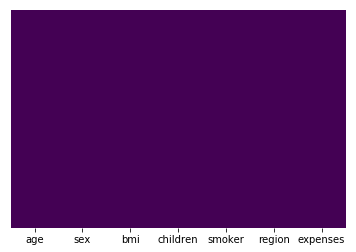

In [6]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Qual o número de fumantes e não fumantes?

In [7]:
data.groupby('smoker').count()

,age,sex,bmi,children,region,expenses
smoker,,,,,,
no,1064,1064,1064,1064,1064,1064
yes,274,274,274,274,274,274


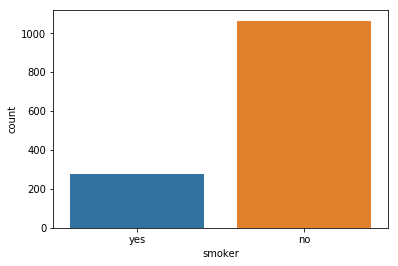

In [8]:
#Fumantes vs total
sns.countplot(x='smoker',data=data)

### Há mais homens ou mulheres?

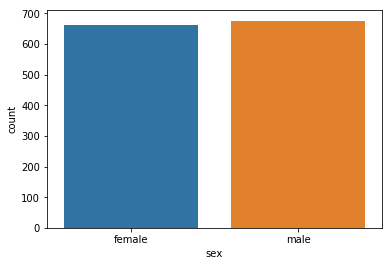

In [9]:
sns.countplot(x='sex',data=data)

### E se fizermos distinção de gênero considerando os fumantes? Haverá mais homens que fumam ou mulheres fumantes?

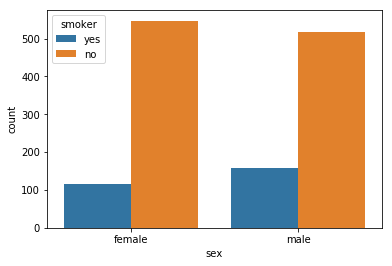

In [10]:
sns.countplot(x='sex', hue='smoker', data=data)

### Como é a distribuição da idade? E a dos gastos?

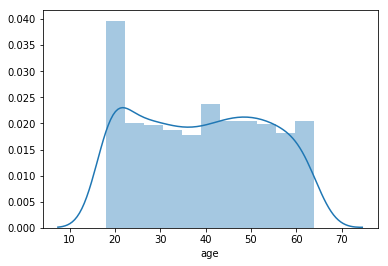

In [11]:
sns.distplot(data['age'], kde = True);

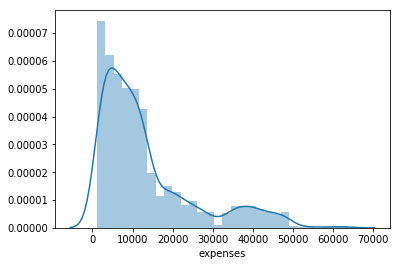

In [12]:
sns.distplot(data['expenses'], kde = True);

### Quem gasta mais com o plano de saúde? Fumantes ou não fumantes?

In [13]:
new_data = data.groupby('smoker').sum()

In [14]:
new_data.reset_index()

,smoker,age,bmi,children,expenses
0,no,41906,32615.0,1160,8974061.63
1,yes,10553,8415.4,305,8781763.56


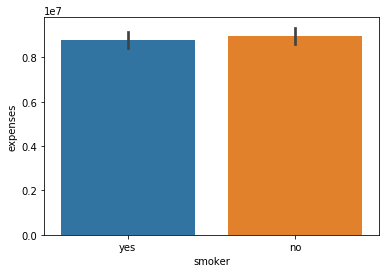

In [15]:
sns.barplot(x="smoker", y="expenses", data=data, estimator=sum)

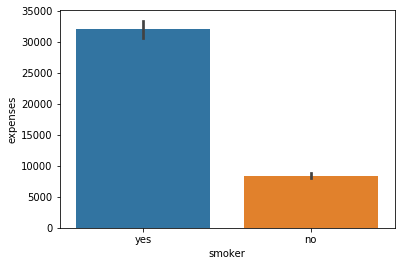

In [16]:
sns.barplot(x="smoker", y="expenses", data=data, estimator=np.mean)

### Quem gasta mais com o plano de saúde? Homens ou Mulheres?

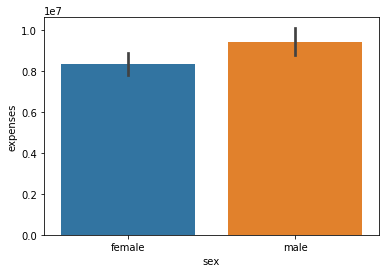

In [17]:
#Sex vs Total
sns.barplot(x="sex", y="expenses", data=data, estimator=sum)

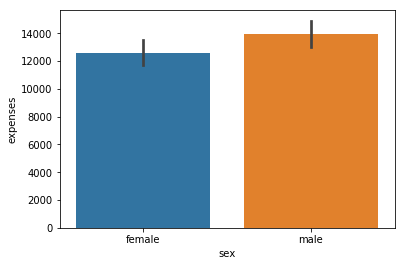

In [18]:
#Sex vs Total
sns.barplot(x="sex", y="expenses", data=data, estimator=np.mean)

### E se considerarmos homens e mulheres, mas fazendo a distinção entre fumantes e não fumantes?

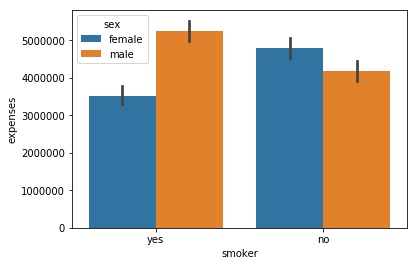

In [19]:
sns.barplot(x="smoker", y="expenses", hue="sex", data=data, estimator=sum)

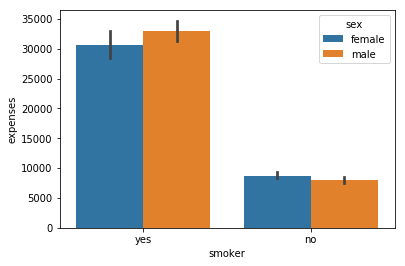

In [20]:
sns.barplot(x="smoker", y="expenses", hue="sex", data=data, estimator=np.mean)

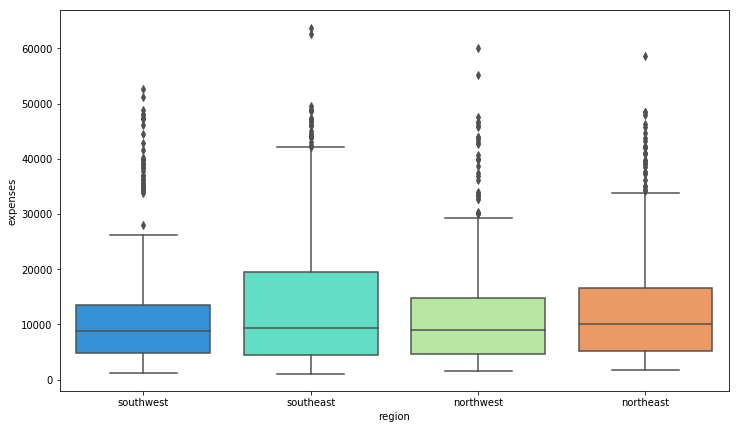

In [21]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='region',y='expenses',data=data, palette='rainbow')

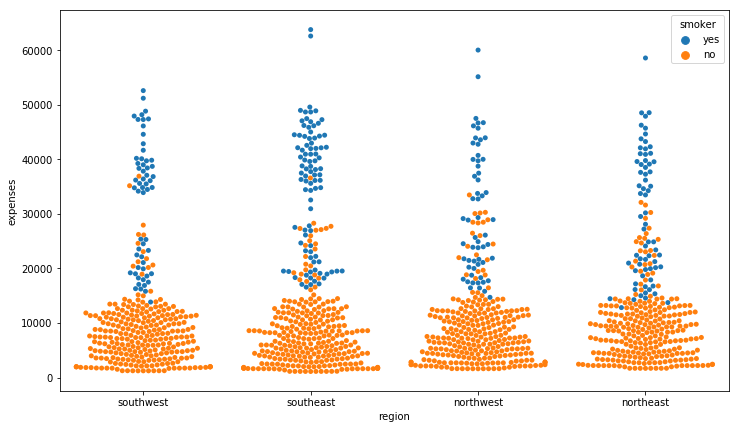

In [22]:
'''
    Mostra uma melhor representação da distribuição de valores, mas não se adapta bem a um grande número de observações. 
    Este estilo de gráfico é às vezes chamado de "beeswarm".
'''
plt.figure(figsize=(12, 7))
sns.swarmplot(x='region',y='expenses', hue="smoker", data=data)

### Vamos verificar algumas correlações ...

In [23]:
data.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


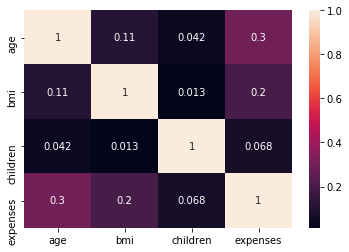

In [24]:
sns.heatmap(data.corr(), annot = True)

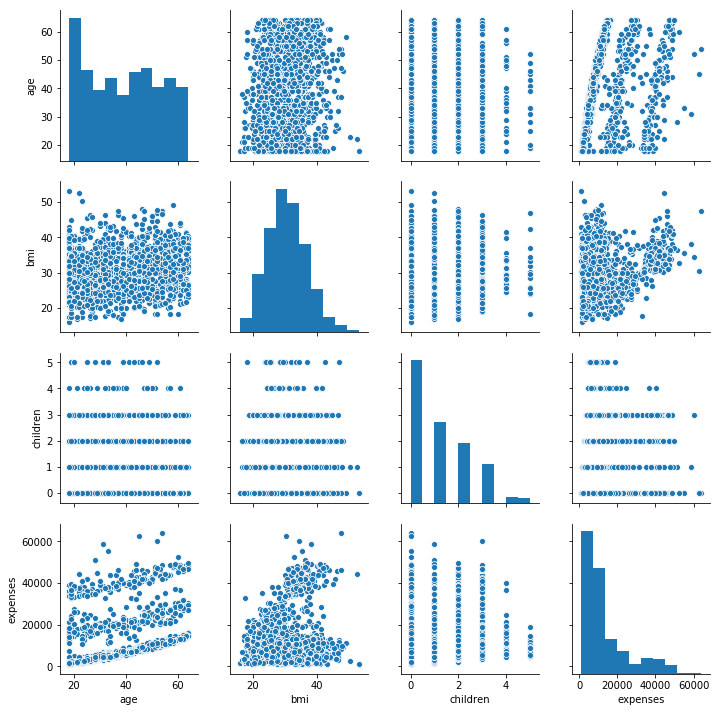

In [25]:
# Basic correlogram
sns.pairplot(data)

### Qual a relação dos gastos com o IMC fazendo distinção dos fumantes?

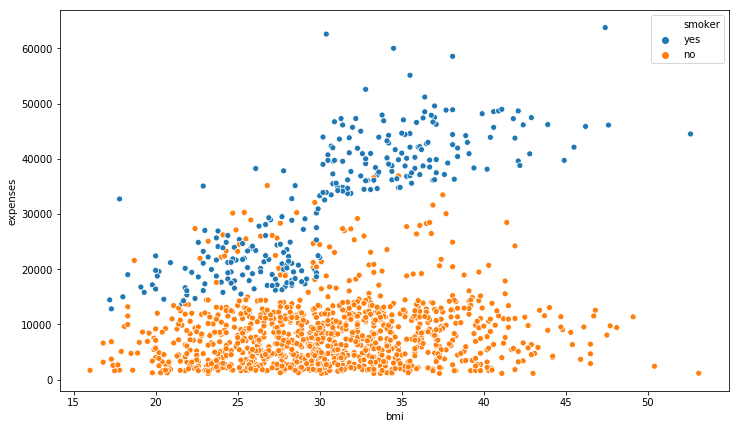

In [26]:
# relação entre a variável x e y
plt.figure(figsize=(12, 7))
sns.scatterplot(x="bmi", y="expenses", hue="smoker", data=data) 

### Qual a relação dos gastos com a idade fazendo distinção dos fumantes?

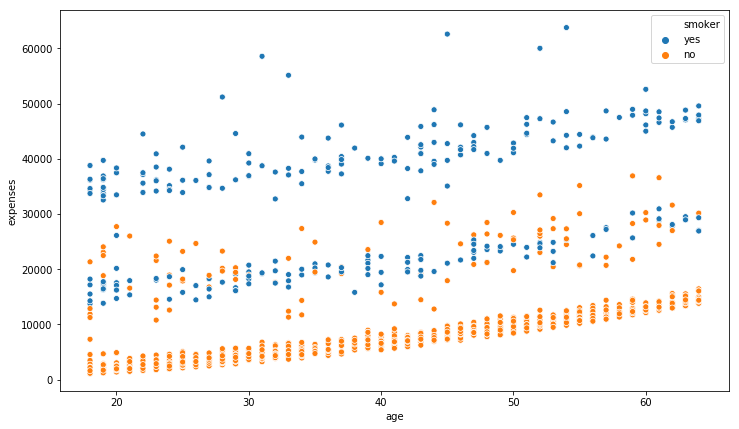

In [27]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x="age", y="expenses", hue="smoker", data=data)

### Referência

- https://seaborn.pydata.org/examples/index.html